# XG Boost #

In [6]:
# import modules
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

In [7]:
# load the dataset
# read csv file to a pandas dataframe
df = pd.read_csv("online_shoppers_intention.csv")

In [8]:
# check for the dataset's keys
df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [9]:
# check for the size of the dataset
df.shape

(12330, 18)

In [10]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative',
 'Administrative_Duration',
 'BounceRates',
 'Browser',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'OperatingSystems',
 'PageValues',
 'ProductRelated',
 'ProductRelated_Duration',
 'Region',
 'SpecialDay',
 'TrafficType',
 'Weekend']

In [11]:
# separate the target variable and rest of variables using iloc
X = df[list_X_columns]
Y = df['Revenue']

In [12]:
#convert the dataset into an optimized data structure called DMatrix
data_dmatrix = xgb.DMatrix(data=X,label=Y)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [14]:
# create the train and test set for cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [15]:
# instantiate an XG Boost regressor object 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [16]:
# fit the regressor to the training set and make predictions on the test set
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)

In [18]:
# compute the rmse
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.283619


In [20]:
# create a hyperparameter dictionary 
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

In [21]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.475374,0.000223,0.475444,0.000520
1,0.450363,0.004972,0.450784,0.004769
2,0.430678,0.007670,0.431249,0.007423
3,0.407737,0.008915,0.408716,0.009108
4,0.390803,0.006338,0.391805,0.006853


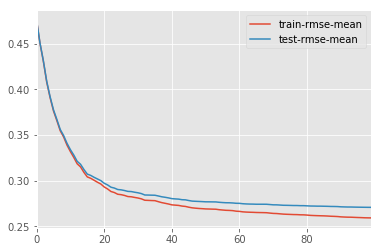

In [22]:
# visualize how rmse changed over training
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-rmse-mean','test-rmse-mean']].plot()

In [23]:
# print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

99    0.270828
Name: test-rmse-mean, dtype: float64


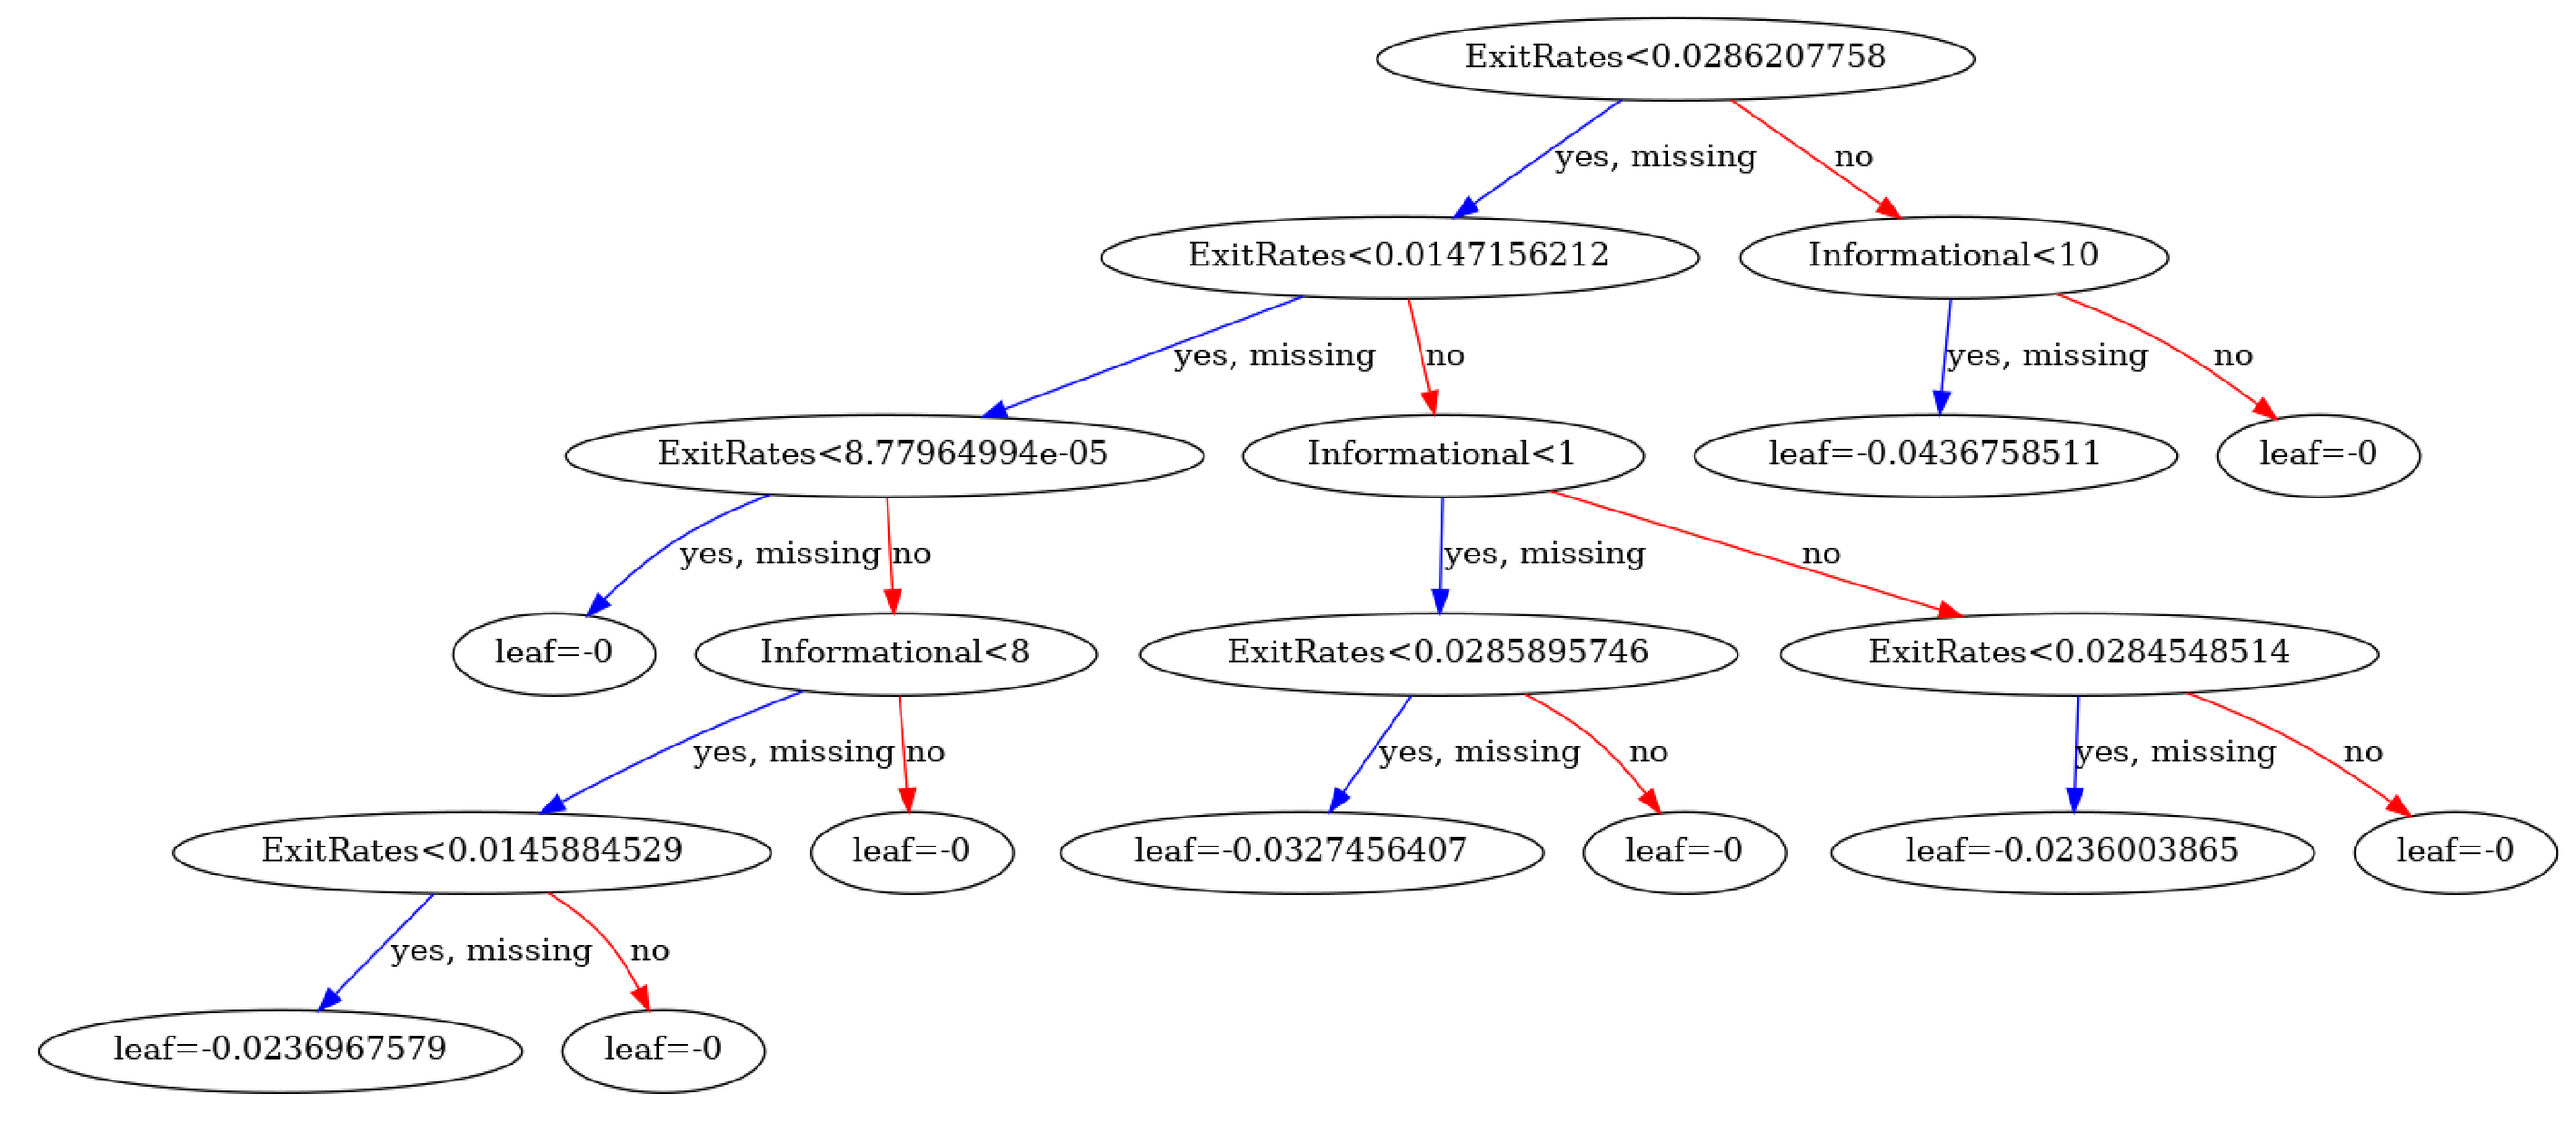

In [24]:
import graphviz
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_reg,num_trees=0)

plt.show()

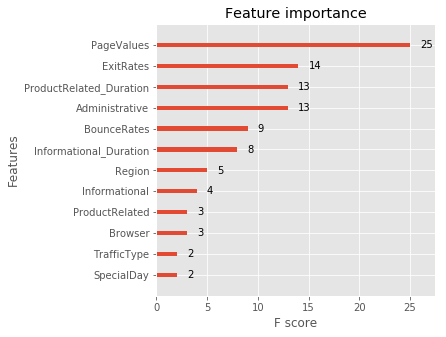

In [25]:
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()